<a href="https://colab.research.google.com/github/RicardxJMG/Probability-and-Statistics-for-ML/blob/main/Probability/Discrete_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Binomial distribution

The binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments
</br>
Let $X$ a random variable, $k$, $n$ the number of trials and $k$ the sucesses
- Probability mass function
$$
  f(k,p,n) = P(X=k) := \binom{n}{k}p^k(1-p)^{n-k}
$$
- Cummulative distribution function
$$
  F(k,p,n) = P(X\leq k) := \sum_{i=1}^{\lfloor k \rfloor} \binom{n}{k} p^k (1-p)^{n-k}
$$
---

In [25]:
from scipy.stats import binom

p = 0.3 #$ probability of success
k = 100 # number of trials

# calculate moments

mean, var, _, _ = binom.stats(k,p,moments='mvsk')

print(f'Mean: {mean}')
print(f'Variance: {var}')

Mean: 30.0
Variance: 21.0


Using the probability mass function to calculate the likelihood of different numbers of successeful outcomes for a sequence of trial, such as 10,20 to 100.

In [26]:
# Calculate the probability of n successes
dist = binom(k,p)

for n in range(10, 110, 10):
  print(f'Probability of {n} successes: {dist.pmf(n)*100:.6f}')

Probability of 10 successes: 0.000117
Probability of 20 successes: 0.757564
Probability of 30 successes: 8.678386
Probability of 40 successes: 0.849017
Probability of 50 successes: 0.001303
Probability of 60 successes: 0.000000
Probability of 70 successes: 0.000000
Probability of 80 successes: 0.000000
Probability of 90 successes: 0.000000
Probability of 100 successes: 0.000000


Given the probability of success is 30% for one trial, we would expect that a probability of 50 or fewer successes out of 100 trials to be close to 100%.

In [27]:
# Calculate the probability of <= n
for n in range(10,110,10):
  print(f'Probability of <= {n} successes: {dist.cdf(n):.5f}')

Probability of <= 10 successes: 0.00000
Probability of <= 20 successes: 0.01646
Probability of <= 30 successes: 0.54912
Probability of <= 40 successes: 0.98750
Probability of <= 50 successes: 0.99999
Probability of <= 60 successes: 1.00000
Probability of <= 70 successes: 1.00000
Probability of <= 80 successes: 1.00000
Probability of <= 90 successes: 1.00000
Probability of <= 100 successes: 1.00000


Plot of the binomial distribution, with probability of 0.3 and 50 trials.

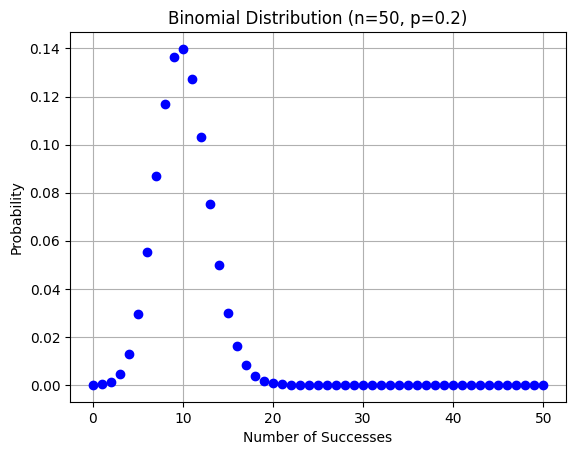

In [28]:
import matplotlib.pyplot as plt
import numpy as np

k_plot = 50
p_plot = 0.2

dist_plot = binom(k_plot, p_plot)

x = np.arange(0, k_plot + 1)

# Calculate the probability mass function (PMF) for each x value
y = dist_plot.pmf(x)

# Plot the distribution
plt.plot(x, y, 'bo')
plt.title('Binomial Distribution (n=50, p=0.2)')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

# 2. Multinomial Distributions

The multinomial distribution, also called categorical distribution, is a generalization of the binomial distribution, i.e, cover the case where there are $r$ possible outcomes.


---

Suposse we have only categories with equal probability $33.33\%$ and $100$ trials

In [41]:
from scipy.stats import multinomial

p = [1.0/3.0, 1.0/3.0, 1.0/3.0] # probability of success
k = 100 # number of trials

dist_multinomial = multinomial(k,p)

# Define a specific number of aoutcomes  from 100 trials
cases = [33,33,34]

pr = dist_multinomial.pmf(cases)

print(f'Probability of cases {cases}: {pr*100}')

Probability of cases [33, 33, 34]: 0.8134712430415981
